In [385]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, validation_curve
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm, naive_bayes, metrics
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from nltk.stem import LancasterStemmer
import nltk
nltk.download('punkt')  # Chỉnh sửa từ 'punkt_tab' thành 'punkt'
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split as ttsplit
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, GaussianNB

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\phamm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [387]:
# Thực hiện load dữ liệu từ file local
# Giả sử bạn đã lưu tệp `mail_data.csv` vào thư mục hiện tại
df = pd.read_csv("D:/Download-PC/Spam-email/mail_data.csv")  # Đảm bảo đường dẫn file là đúng
message_X = df.iloc[:,1]  # Gán cột EmailText
labels_Y = df.iloc[:,0]   # Gán cột Label

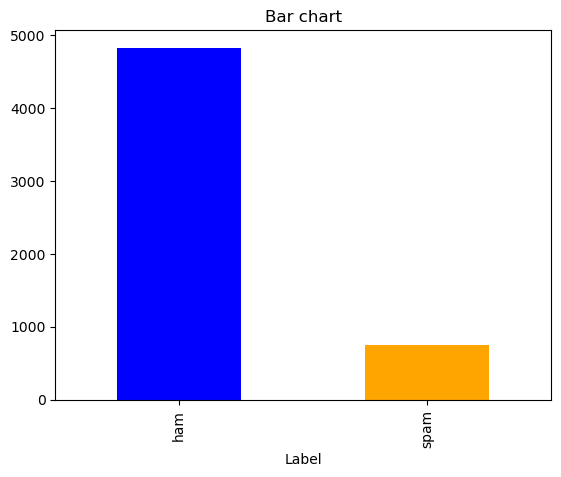

In [389]:
# Hiển thị thống kê dữ liệu
count_Class = pd.Series(df["Label"]).value_counts(sort=True)
count_Class.plot(kind='bar', color=["blue", "orange"])
plt.title('Bar chart')
plt.show()

In [391]:
df["Label"].value_counts()

Label
ham     4825
spam     747
Name: count, dtype: int64

In [393]:
4825/(4825+747)

0.8659368269921034

In [395]:
# Khởi tạo biến
lstem = LancasterStemmer()

def mess(messages):
    message_x = []
    for me_x in messages:
        # Lọc dữ liệu ngoài trừ bảng chữ cái
        me_x = ''.join(filter(lambda mes: (mes.isalpha() or mes == " "), me_x))
        # Chia nhỏ các body email thành các từ
        words = word_tokenize(me_x)
        # Nhóm các từ gốc lại
        message_x += [' '.join([lstem.stem(word) for word in words])]
    return message_x

In [397]:
# Xử lý các túi từ, vector hóa, bỏ các từ dừng stopwords không cần thiết
tfvec = TfidfVectorizer(stop_words='english')
# Vectorizing feature data
x_new = tfvec.fit_transform(message_x).toarray()

In [399]:
# Tách dataset thành dữ liệu training và testing
x_train, x_test, y_train, y_test = ttsplit(x_new, y_new, test_size=0.2, random_state=1)

In [401]:
# Sử dụng các model để phân loại
classifier = svm.SVC(kernel='linear')  # Chạy thuật toán Support Vector Machine
# classifier = LogisticRegression()
# classifier = MultinomialNB()  # Chạy thuật toán Naive Bayes
# Cross-validation để đánh giá hiệu suất của model
# scores = cross_val_score(classifier, x_train, y_train, cv=5)
# print("Cross-validation accuracy: ", scores.mean(), *+/-* scores.std())

In [403]:
# Kiểm tra kiểu dữ liệu của y_train
print(type(y_train))  # Kiểm tra kiểu dữ liệu
print(y_train[:10])  # In ra 10 giá trị đầu tiên của y_train

# Chuyển y_train về kiểu dữ liệu int nếu chưa
y_train = y_train.astype(int)

# Kiểm tra lại kiểu dữ liệu sau khi chuyển đổi
print(type(y_train))  # Kiểm tra kiểu dữ liệu lại
print(y_train[:10])  # In ra 10 giá trị đầu tiên của y_train

# Kiểm tra các giá trị duy nhất trong y_train
print(np.unique(y_train))  # Kiểm tra các giá trị duy nhất trong y_train

# Kiểm tra các giá trị trong x_train
assert not np.any(np.isnan(x_train)), "x_train chứa NaN!"

<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 1 0 0]
<class 'numpy.ndarray'>
[0 0 0 0 0 0 0 1 0 0]
[0 1]


In [405]:
classifier.fit(x_train, y_train)

SVC(kernel='linear')

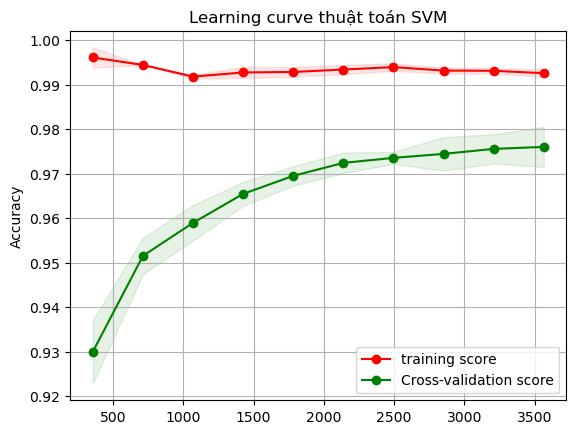

In [406]:
# Định nghĩa range cho training size
train_sizes = np.linspace(0.1, 1.0, 10)
# Sử dụng learning curve cho SVM model
train_sizes, train_scores, val_scores = learning_curve(classifier, x_train, y_train, train_sizes=train_sizes, cv=5)
# Tính giá trị trung bình và độ lệch cho training và validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)
# Vẽ curve
plt.figure()
plt.title('Learning curve thuật toán SVM')
# plt.title('Learning curve thuật toán NB')
plt.ylabel("Accuracy")
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, alpha=0.1,
                 color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="training score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [407]:
# In ra các giá trị đầu tiên của y_test và các giá trị dự đoán từ mô hình
print("y_test:", y_test[:10])
print("Predictions:", classifier.predict(x_test)[:10])

# Kiểm tra kiểu dữ liệu của y_test và dự đoán
print("y_test type:", type(y_test))
print("Predictions type:", type(classifier.predict(x_test)))

# Kiểm tra các giá trị duy nhất trong y_test và dự đoán
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in predictions:", np.unique(classifier.predict(x_test)))

# Đảm bảo y_test và dự đoán đều là kiểu int
y_test = y_test.astype(int)
predictions = classifier.predict(x_test).astype(int)

# Kiểm tra lại sau khi chuyển đổi
print("Unique values in y_test:", np.unique(y_test))
print("Unique values in predictions:", np.unique(predictions))

y_test: [0 0 0 0 0 0 0 0 0 0]
Predictions: [0 0 0 0 0 0 0 0 0 0]
y_test type: <class 'numpy.ndarray'>
Predictions type: <class 'numpy.ndarray'>
Unique values in y_test: [0 1]
Unique values in predictions: [0 1]
Unique values in y_test: [0 1]
Unique values in predictions: [0 1]


In [408]:
# Tính toán các chỉ số đánh giá
Accuracy = accuracy_score(y_test, predictions)
Precision = precision_score(y_test, predictions)
Recall = recall_score(y_test, predictions)
F1_Score = f1_score(y_test, predictions)

# In kết quả
print('Accuracy: {:.2f}%'.format(Accuracy * 100))
print('Precision: {:.2f}%'.format(Precision * 100))
print('Recall: {:.2f}%'.format(Recall * 100))
print('F1-Score: {:.2f}%'.format(F1_Score * 100))


Accuracy: 97.94%
Precision: 98.44%
Recall: 85.71%
F1-Score: 91.64%


In [409]:
# Tính toán confusion
m_confusion_test = metrics.confusion_matrix(y_test, classifier.predict(x_test))
pd.DataFrame(data=m_confusion_test, columns=['Dự Đoán (Ham)', 'Dự đoán (Spam)'],
             index=['Thực tế (Ham)', 'Thực tế (Spam)'])

,Dự Đoán (Ham),Dự đoán (Spam)
Thực tế (Ham),966,2
Thực tế (Spam),21,126


Confusion Matrix is : 
 [[966   2]
 [ 21 126]]


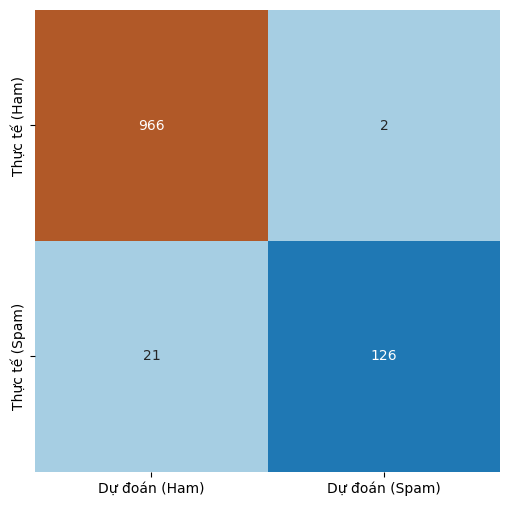

In [410]:
# Vẽ lên biểu đồ
import seaborn as sns
cmat = confusion_matrix(y_test, classifier.predict(x_test))
print('Confusion Matrix is : \n', cmat)
plt.figure(figsize=(6, 6))
sns.heatmap(cmat, annot=True, cmap='Paired', cbar=False, fmt="d",
            xticklabels=['Dự đoán (Ham)', 'Dự đoán (Spam)'],
            yticklabels=['Thực tế (Ham)', 'Thực tế (Spam)']);